In [5]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

Don't forget to make font larger!

## Conditional Statements

In [1]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 0:
        print('positive')
    if x < 0:
        print('negative')
    if x == 0:
        print('zero')

sign(3)
sign(-3)
sign(0)

3 is positive
-3 is negative
0 is zero


In [2]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 0:
        print('positive')
    if x < 0:
        print('negative')
    else:
        print('zero')

sign(3)
sign(-3)
sign(0)

3 is positive
zero
-3 is negative
0 is zero


In [3]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 1e-15:
        print('positive')
    elif x < -1e-15:
        print('negative')
    elif x == 0:
        print('zero')
    else:
        print('really close to zero')

sign(3)
sign(-3)
sign(0)
sign(2**0.5 * 2 **0.5 - 2)

3 is positive
-3 is negative
0 is zero
4.440892098500626e-16 is really close to zero


## For Statements

In [6]:
np.append(make_array(1, 2, 3), 4)

array([1, 2, 3, 4])

In [7]:
np.append(make_array(1, 2, 3), 'four')

array(['1', '2', '3', 'four'], 
      dtype='<U21')

In [8]:
np.append(make_array(1, 2, 3), make_array(4, 5, 6))

array([1, 2, 3, 4, 5, 6])

In [9]:
np.arange(4)

array([0, 1, 2, 3])

In [10]:
for i in np.arange(4):
    print('iteration', i)

iteration 0
iteration 1
iteration 2
iteration 3


In [11]:
coin = make_array('heads', 'tails')
np.random.choice(coin, 5)

array(['tails', 'heads', 'tails', 'heads', 'tails'], 
      dtype='<U5')

In [12]:
np.count_nonzero(np.random.choice(coin, 100) == 'heads')

49

In [13]:
num_heads = make_array()

np.append doesn't change the original array

In [14]:
np.append(num_heads, np.count_nonzero(np.random.choice(coin, 100) == 'heads'))
num_heads

array([], dtype=float64)

In [15]:
num_heads = np.append(num_heads, np.count_nonzero(np.random.choice(coin, 100) == 'heads'))
num_heads

array([ 52.])

In [16]:
for i in np.arange(10000):
    num_heads = np.append(num_heads, np.count_nonzero(np.random.choice(coin, 100) == 'heads'))
num_heads

array([ 52.,  50.,  50., ...,  50.,  45.,  51.])

In [17]:
len(num_heads)

10001

Discussion question: What do you think the plot will look like? What do think the minimum number of heads will be? The maximum?

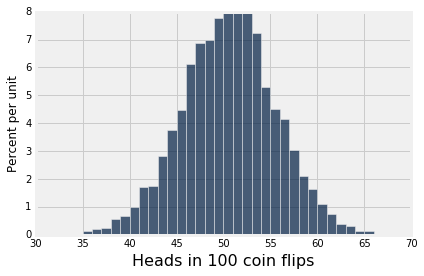

In [18]:
t = Table().with_column('Heads in 100 coin flips', num_heads)
t.hist(bins=np.arange(30, 70, 1))

In [19]:
t.column(0).min()

32.0

In [20]:
t.column(0).max()

68.0

## Monty Hall

Walk through how to construct this process.

In [21]:
doors = make_array(1, 2, 3)
doors

array([1, 2, 3])

In [22]:
prizes = make_array('car', 'first goat', 'second goat')
prizes

array(['car', 'first goat', 'second goat'], 
      dtype='<U11')

In [23]:
np.random.choice(prizes, 3, replace=False)

array(['car', 'first goat', 'second goat'], 
      dtype='<U11')

In [24]:
def setup():
    """Return a random game of Let's Make a Deal."""
    return Table().with_columns(
        'Door', doors,
        'Prize', np.random.choice(prizes, 3, replace=False)
    )

a_game = setup()
a_game

Door,Prize
1,second goat
2,car
3,first goat


Walk through how to write this slowly:

**How would you define a function `behind` that takes in a game and a door number and prints out something like:**

`Behind door number 1 is the second goat`

In [26]:
def behind(game, door):
    """Return the prize behind a door."""
    return game.where('Door', door).column('Prize').item(0)

for door in doors:
    print('Behind door number', door, 'is the', behind(a_game, door))

Behind door number 1 is the second goat
Behind door number 2 is the car
Behind door number 3 is the first goat


In [27]:
def location(game, prize):
    """Return the door that hides a prize."""
    return game.where('Prize', prize).column('Door').item(0)

for prize in prizes:
    print('The', prize, 'is behind door number', location(a_game, prize))

The car is behind door number 2
The first goat is behind door number 3
The second goat is behind door number 1


In [28]:
a_guess = np.random.choice(doors)
a_guess

2

**How would you write a function `expose` that takes in a game and a guessed door number and shows which door Monty Hall would open to expose a goat?**

In [29]:
def expose(game, guess):
    """Return the door that Monty Hall opens to expose a goat."""
    guessed_prize = behind(game, guess)
    if guessed_prize == 'first goat':
        reveal = 'second goat'
    elif guessed_prize == 'second goat':
        reveal = 'first goat'
    else:
        reveal = np.random.choice(['first goat', 'second goat'])
    return location(game, reveal)

an_exposed_door = expose(a_game, a_guess)
print('The contestant picked door', a_guess, 'which hides the', behind(a_game, a_guess))
print('Monty Hall opens door', an_exposed_door, 'to expose the', behind(a_game, an_exposed_door))

The contestant picked door 2 which hides the car
Monty Hall opens door 1 to expose the second goat


In [30]:
def other(game, guess, exposed):
    """Return the door that is not the guess or the exposed."""
    return (1 + 2 + 3) - guess - exposed

the_remaining_door = other(a_game, a_guess, an_exposed_door)
print('The remaining door', the_remaining_door, 'hides the', behind(a_game, the_remaining_door))

The remaining door 3 hides the first goat


In [31]:
trials = Table(['trial', 'guess', 'exposed', 'remaining'])
for i in np.arange(10000)+1:
    game = setup()
    guess = np.random.choice(doors)
    exposed = expose(game, guess)
    remaining = other(game, guess, exposed)
    trials.append([i, behind(game, guess), behind(game, exposed), behind(game, remaining)])
    
trials

trial,guess,exposed,remaining
1,first goat,second goat,car
2,first goat,second goat,car
3,second goat,first goat,car
4,second goat,first goat,car
5,first goat,second goat,car
6,second goat,first goat,car
7,first goat,second goat,car
8,car,first goat,second goat
9,second goat,first goat,car
10,car,first goat,second goat


In [32]:
trials.group('guess')

guess,count
car,3314
first goat,3349
second goat,3337


In [33]:
trials.group('exposed')

exposed,count
first goat,4936
second goat,5064


In [34]:
trials.group('remaining')

remaining,count
car,6686
first goat,1715
second goat,1599


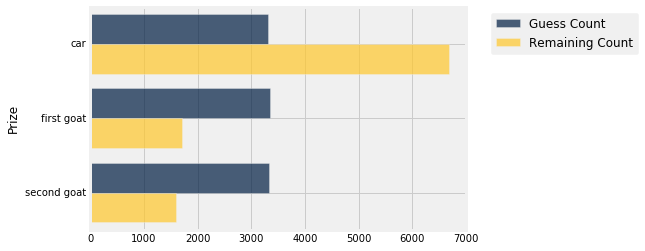

In [35]:
compare = trials.group('guess').join('guess', trials.group('remaining'), 'remaining')
compare.relabeled(0, 'Prize').relabeled(1, 'Guess Count').relabeled(2, 'Remaining Count').barh(0)

## Probability

#### Tickets

Red Green Blue

What's the chance of GR when sampling two cards without replacement

RB RG BR BG GR GB

P(GR) = 1/6

P(one R and one G) = P(GR) + P(RG) = 1/6 + 1/6
